In [50]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/Train.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Get statistical summary of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [51]:
import numpy as np

# Define a function to detect and handle outliers using IQR
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply outlier handling to specific columns
handle_outliers(data, 'Item_Weight')
handle_outliers(data, 'Item_Visibility')
handle_outliers(data, 'Item_MRP')
handle_outliers(data, 'Item_Outlet_Sales')


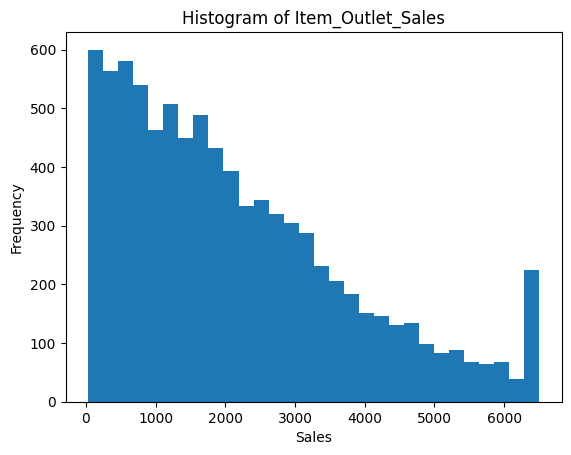

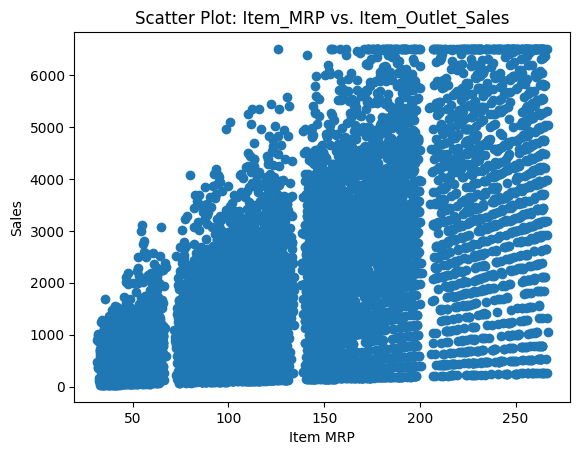

In [52]:
import matplotlib.pyplot as plt

# Create a histogram of Item_Outlet_Sales
plt.hist(data['Item_Outlet_Sales'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Item_Outlet_Sales')
plt.show()

# Create a scatter plot of Item_MRP vs. Item_Outlet_Sales
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.title('Scatter Plot: Item_MRP vs. Item_Outlet_Sales')
plt.show()


In [53]:
# Select categorical columns for one-hot encoding
cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=cat_columns)


In [54]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = data_encoded.drop('Item_Outlet_Sales', axis=1)
y = data_encoded['Item_Outlet_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Drop 'Item_Identifier' column, if applicable
if 'Item_Identifier' in X_train.columns:
    X_train = X_train.drop(columns=['Item_Identifier'])

if 'Item_Identifier' in X_test.columns:
    X_test = X_test.drop(columns=['Item_Identifier'])


In [56]:
import xgboost as xgb

# Define the XGBoost model
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
predictions = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('RMSE:', rmse)


RMSE: 1057.194930590912


In [57]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best Parameters:', best_params)
print('Best Score:', best_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.6012747982212715


In [58]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Perform standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform robust scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the final RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Final RMSE:', final_rmse)


Final RMSE: 1057.194930590912
